# Sentiment Analysis
- dataset: Amazon fine food reviews

baselines:

1. VADER - bag of words method
2. Roberta pretrained Model from 🤗 (Hugging Face)
3. Huggingface Pipeline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot') # R style

In [3]:
import nltk

In [4]:
path = 'D:/Users/pc/Documents/VscodeFiles/dataset/NLP projects/Reviews.csv'
df = pd.read_csv(path)

In [5]:
df.head()
# id product_id user_id profile_name ...

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [6]:
# we are focus on text
df.Text.values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [7]:
df.shape

(568454, 10)

In [8]:
# OPTION!!!
# we select 500 rows for initial
# df = df.head(500)
# df = df.sample(n=140000, replace=False)
# df.reset_index(drop=True, inplace=True)

# EDA

In [9]:
df.Score.value_counts()

Score
5    89671
4    19797
1    12794
3    10404
2     7334
Name: count, dtype: int64

In [10]:
df.Score.value_counts().sort_index() # star from 1 to 5 asc

Score
1    12794
2     7334
3    10404
4    19797
5    89671
Name: count, dtype: int64

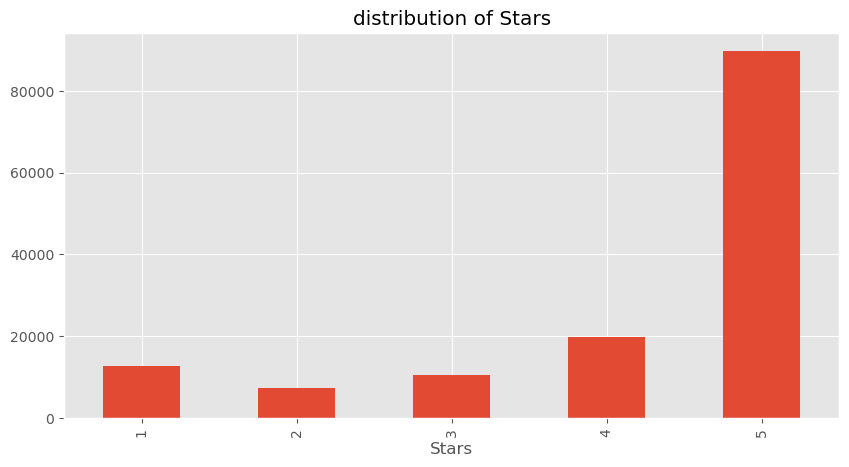

In [11]:
ax = df.Score.value_counts().sort_index().plot( # series.plot(params)
    kind='bar',
    title='distribution of Stars',
    figsize=(10, 5)
)
ax.set_xlabel('Stars')
plt.show()

# Basic NLTK

In [12]:
# take example text
example = df.Text[49]
example

'Nice and crunchy, only one bag felt stale a little. Also only about 6-8 in each bag where not opened.<br />Very good and right amount, hope they get them back.'

In [13]:
# change text into tokens using NLTK
tokens = nltk.word_tokenize(example)
tokens[:10]

['Nice', 'and', 'crunchy', ',', 'only', 'one', 'bag', 'felt', 'stale', 'a']

In [14]:
# get pos of these tokens 
# pos is part of speech
tagged = nltk.pos_tag(tokens)
tagged[:5]

[('Nice', 'NNP'), ('and', 'CC'), ('crunchy', 'NN'), (',', ','), ('only', 'RB')]

(S
  Nice/NNP
  and/CC
  crunchy/NN
  ,/,
  only/RB
  one/CD
  bag/NN
  felt/VBD
  stale/PDT
  a/DT
  little/JJ
  ./.
  Also/RB
  only/RB
  about/IN
  6-8/JJ
  in/IN
  each/DT
  bag/NN
  where/WRB
  not/RB
  opened./VB
  </NNP
  br/NN
  //NNP
  >/NNP
  Very/NNP
  good/JJ
  and/CC
  right/JJ
  amount/NN
  ,/,
  hope/VBP
  they/PRP
  get/VB
  them/PRP
  back/RB
  ./.)


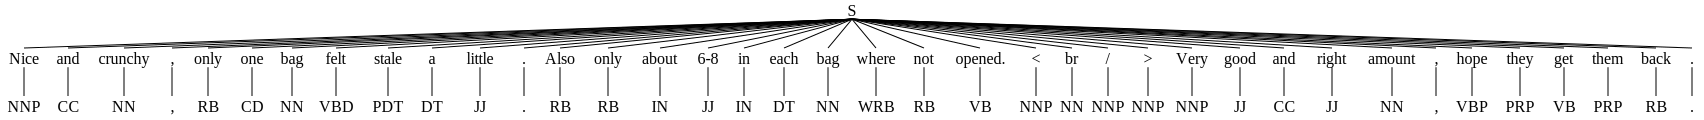

In [15]:
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')

# this is a tree structure

entities = nltk.chunk.ne_chunk(tagged) # NER???
entities.pprint()
entities

# Baselien1: VADER(Valance Aware Dictionary and Entiment Reasoner)

- bag of words method

1. stop words are removed
2. each word is scored and combined to a total score

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [17]:
# nltk.download('vader_lexicon')

In [18]:
sen_int_analyzer = SentimentIntensityAnalyzer()

In [19]:
# demo
sen_int_analyzer.polarity_scores('Fuck!')
# compound: aggregation of neg, pos, neu
# from -1 to 1

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5848}

In [20]:
sen_int_analyzer.polarity_scores('I don\'t like it')

{'neg': 0.513, 'neu': 0.487, 'pos': 0.0, 'compound': -0.2755}

In [21]:
# recall our example
print(example)
sen_int_analyzer.polarity_scores(example)

Nice and crunchy, only one bag felt stale a little. Also only about 6-8 in each bag where not opened.<br />Very good and right amount, hope they get them back.


{'neg': 0.071, 'neu': 0.762, 'pos': 0.167, 'compound': 0.5096}

entire dataset with si_analyzer

In [22]:
df.head()

Id   ProductId          UserId               ProfileName  \
0  119109  B004IREFUM  A2SWVF1XU7HWHI             Lobo in the D   
1   42382  B000F0FX52  A1J7R2ATLJX4U4  Marianna Settles "RPoli"   
2  494566  B003G1ZRTY   AUGW5H5OWN6BQ                   kangas3   
3  139274  B004T80BYE  A36CI9LLL400DU               Jennifer Mo   
4  416403  B000KCP1FM  A1ZYBPNLA9WZ9Q             Terry "gmted"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     0                       0      4  1310342400   
1                     2                       5      4  1187913600   
2                     0                       0      5  1334707200   
3                     2                       3      4  1319673600   
4                     8                       8      5  1269907200   

                                       Summary  \
0                                  Good coffee   
1                                     Sprouter   
2                                         Good   
3  Nice flavor, but not entirely user friendly   
4                          Pecan Pumkin Butter   

                                                Text  
0  This is a very good coffee for everyday enjoym...  
1  The sprouter is working fine.  My seeds are sp...  
2  I don't understand why so many reviewers are b...  
3  Assuming you like the taste of coconut (and I ...  
4  Purchased this product, for my wife, who loves...

In [23]:
result = {} # empty dict

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row.Text
    myid = row.Id
    result[myid] = sen_int_analyzer.polarity_scores(text)

  0%|          | 0/140000 [00:00<?, ?it/s]

In [24]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders.head()

Id    neg    neu    pos  compound
0  119109  0.040  0.740  0.219    0.8649
1   42382  0.000  0.859  0.141    0.2023
2  494566  0.083  0.886  0.031   -0.8168
3  139274  0.025  0.826  0.149    0.9952
4  416403  0.000  0.781  0.219    0.9144

In [25]:
vaders = vaders.merge(df, how='left') # left join with original data

In [26]:
# left join and we get final dataset
vaders.head()

Id    neg    neu    pos  compound   ProductId          UserId  \
0  119109  0.040  0.740  0.219    0.8649  B004IREFUM  A2SWVF1XU7HWHI   
1   42382  0.000  0.859  0.141    0.2023  B000F0FX52  A1J7R2ATLJX4U4   
2  494566  0.083  0.886  0.031   -0.8168  B003G1ZRTY   AUGW5H5OWN6BQ   
3  139274  0.025  0.826  0.149    0.9952  B004T80BYE  A36CI9LLL400DU   
4  416403  0.000  0.781  0.219    0.9144  B000KCP1FM  A1ZYBPNLA9WZ9Q   

                ProfileName  HelpfulnessNumerator  HelpfulnessDenominator  \
0             Lobo in the D                     0                       0   
1  Marianna Settles "RPoli"                     2                       5   
2                   kangas3                     0                       0   
3               Jennifer Mo                     2                       3   
4             Terry "gmted"                     8                       8   

   Score        Time                                      Summary  \
0      4  1310342400                                  Good coffee   
1      4  1187913600                                     Sprouter   
2      5  1334707200                                         Good   
3      4  1319673600  Nice flavor, but not entirely user friendly   
4      5  1269907200                          Pecan Pumkin Butter   

                                                Text  
0  This is a very good coffee for everyday enjoym...  
1  The sprouter is working fine.  My seeds are sp...  
2  I don't understand why so many reviewers are b...  
3  Assuming you like the taste of coconut (and I ...  
4  Purchased this product, for my wife, who loves...

plot the result

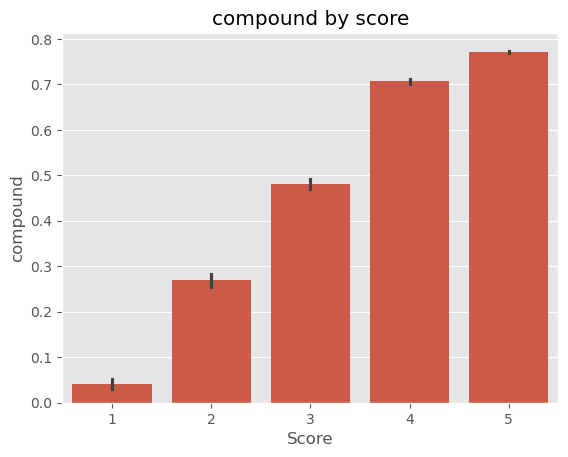

In [27]:
ax = sns.barplot(
    data = vaders,
    x='Score',
    y='compound'
)
ax.set_title('compound by score')
plt.show()

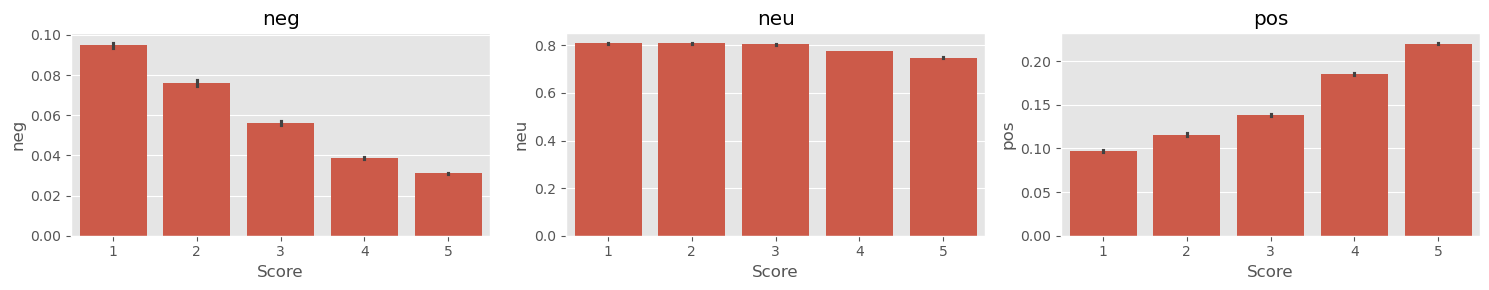

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
# ??? .subplot <=> .subplots
sns.barplot(
    data=vaders,
    x='Score',
    y='neg',
    ax=axes[0]
)
sns.barplot(
    data=vaders,
    x='Score',
    y='neu',
    ax=axes[1]
)
sns.barplot(
    data=vaders,
    x='Score',
    y='pos',
    ax=axes[2]
)
axes[0].set_title('neg')
axes[1].set_title('neu')
axes[2].set_title('pos')
plt.tight_layout() # for better visualization
plt.show()

# baseline2: hugging face
- pre-train model is using a large corpus of data
- transformer not only works on words but also focus on context related to words

In [29]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax # for classification
import torch

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [31]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL) # no need on GPU
model = AutoModelForSequenceClassification.from_pretrained(MODEL).to(device)

In [32]:
# recall example from vader
# we want to make comparison
print(example)
sen_int_analyzer.polarity_scores(example)

Nice and crunchy, only one bag felt stale a little. Also only about 6-8 in each bag where not opened.<br />Very good and right amount, hope they get them back.


{'neg': 0.071, 'neu': 0.762, 'pos': 0.167, 'compound': 0.5096}

In [33]:
# example for roberta model
encoded_text = tokenizer(example, return_tensors='pt').to(device)
encoded_text

{'input_ids': tensor([[    0, 41541,     8, 14291,   219,     6,   129,    65,  3298,  1299,
         37367,    10,   410,     4,  1578,   129,    59,   231,    12,   398,
            11,   349,  3298,   147,    45,  1357, 49069,  3809, 48709, 25101,
           205,     8,   235,  1280,     6,  1034,    51,   120,   106,   124,
             4,     2]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
       device='cuda:0')}

In [34]:
with torch.no_grad():
    output = model(**encoded_text) # on GPU
type(output), output

(transformers.modeling_outputs.SequenceClassifierOutput,
 SequenceClassifierOutput(loss=None, logits=tensor([[-1.9780, -0.1956,  2.6462]], device='cuda:0'), hidden_states=None, attentions=None))

In [35]:
scores = output[0][0].detach().cpu().numpy()
scores

array([-1.9780362 , -0.19560762,  2.6462274 ], dtype=float32)

In [36]:
scores = softmax(scores)
scores

array([0.0091851 , 0.05459877, 0.9362161 ], dtype=float32)

In [37]:
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
scores_dict

{'roberta_neg': 0.009185101,
 'roberta_neu': 0.05459877,
 'roberta_pos': 0.9362161}

In [38]:
# create a function of above
def polarity_scores_roberta(text):
    encoded_text = tokenizer(text, return_tensors='pt').to(device=device)
    output = model(**encoded_text) # decoder
    scores = output[0][0].detach().cpu().numpy() # get ndarray
    scores = softmax(scores) # make it a prob vector
    scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
    }
    return scores_dict 

In [39]:
result = {} # empty dict

for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row.Text
        myid = row.Id
        vader_result = sen_int_analyzer.polarity_scores(text)  
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f'vader_{key}'] = value 
        roberta_result = polarity_scores_roberta(text) # roberta prefer using GPU

        both = {**vader_result_rename, **roberta_result} # old version
        result[myid] = both
    except RuntimeError:
        print(f'break for id {myid}')


  0%|          | 0/140000 [00:00<?, ?it/s]

break for id 139274
break for id 149023
break for id 241458
break for id 407547
break for id 38066
break for id 447374
break for id 446353
break for id 500605
break for id 215742
break for id 397826
break for id 19134
break for id 345850
break for id 89792
break for id 171865
break for id 248257
break for id 320586
break for id 135493
break for id 56619
break for id 515089
break for id 413012
break for id 398259
break for id 430782
break for id 424671
break for id 448044
break for id 116922
break for id 75507
break for id 206664
break for id 179077
break for id 373718
break for id 259606
break for id 155226
break for id 160727
break for id 41623
break for id 491241
break for id 216365
break for id 127023
break for id 56793
break for id 316591
break for id 284507
break for id 257923
break for id 71120
break for id 186476
break for id 166968
break for id 446828
break for id 331757
break for id 479869
break for id 330440
break for id 151099
break for id 447057
break for id 200575
break fo

In [40]:
result_df = pd.DataFrame(result).T
result_df = result_df.reset_index().rename(columns={'index': 'Id'})
result_df.head()

Id  vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  \
0  119109      0.040      0.740      0.219          0.8649     0.017998   
1   42382      0.000      0.859      0.141          0.2023     0.004768   
2  494566      0.083      0.886      0.031         -0.8168     0.085584   
3  416403      0.000      0.781      0.219          0.9144     0.001458   
4  537364      0.000      0.750      0.250          0.9005     0.085112   

   roberta_neu  roberta_pos  
0     0.125102     0.856900  
1     0.164686     0.830546  
2     0.342195     0.572221  
3     0.007446     0.991096  
4     0.219075     0.695813

In [41]:
result_df = result_df.merge(df, how='left') # left join with original data

In [42]:
result_df.head() # final df

Id  vader_neg  vader_neu  vader_pos  vader_compound  roberta_neg  \
0  119109      0.040      0.740      0.219          0.8649     0.017998   
1   42382      0.000      0.859      0.141          0.2023     0.004768   
2  494566      0.083      0.886      0.031         -0.8168     0.085584   
3  416403      0.000      0.781      0.219          0.9144     0.001458   
4  537364      0.000      0.750      0.250          0.9005     0.085112   

   roberta_neu  roberta_pos   ProductId          UserId  \
0     0.125102     0.856900  B004IREFUM  A2SWVF1XU7HWHI   
1     0.164686     0.830546  B000F0FX52  A1J7R2ATLJX4U4   
2     0.342195     0.572221  B003G1ZRTY   AUGW5H5OWN6BQ   
3     0.007446     0.991096  B000KCP1FM  A1ZYBPNLA9WZ9Q   
4     0.219075     0.695813  B0034EFIYC  A1L1BRAZEDW2IK   

                ProfileName  HelpfulnessNumerator  HelpfulnessDenominator  \
0             Lobo in the D                     0                       0   
1  Marianna Settles "RPoli"                     2                       5   
2                   kangas3                     0                       0   
3             Terry "gmted"                     8                       8   
4          fearalicesgarden                     0                       5   

   Score        Time              Summary  \
0      4  1310342400          Good coffee   
1      4  1187913600             Sprouter   
2      5  1334707200                 Good   
3      5  1269907200  Pecan Pumkin Butter   
4      1  1337558400          Not so good   

                                                Text  
0  This is a very good coffee for everyday enjoym...  
1  The sprouter is working fine.  My seeds are sp...  
2  I don't understand why so many reviewers are b...  
3  Purchased this product, for my wife, who loves...  
4  I tried this flavor thinking it would be simil...

# Visualization and Comparison

In [43]:
# before input list, we copy from .columns
result_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

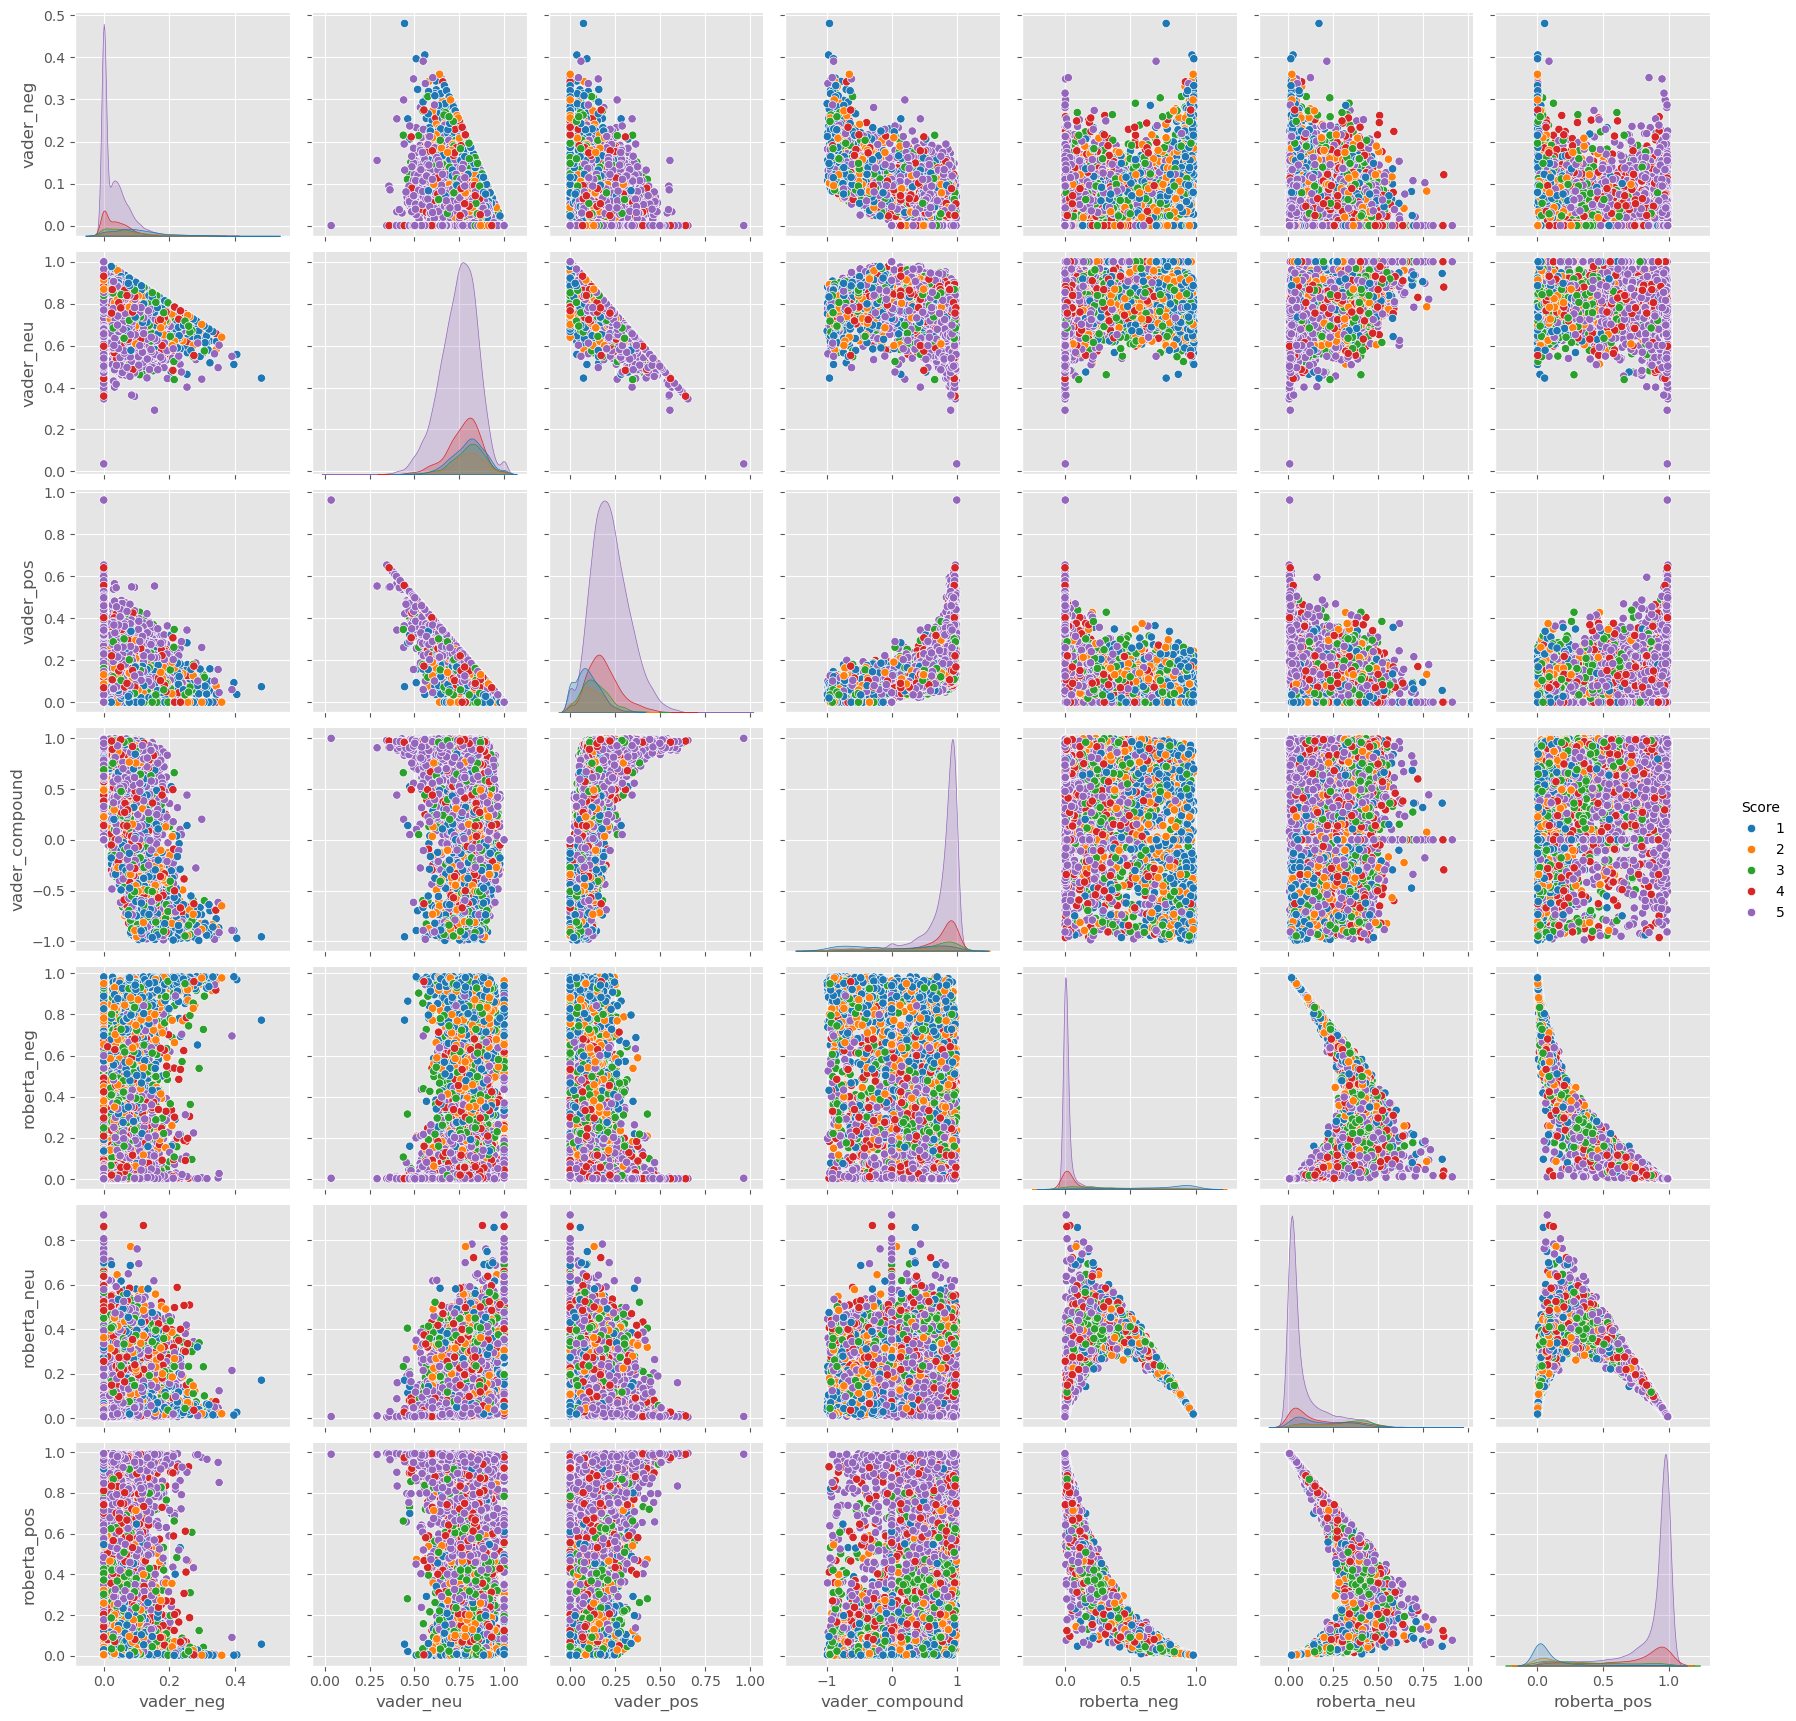

In [44]:
sns.pairplot(
    data=result_df,
    vars=['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos'], # paste
    hue='Score', # color
    palette='tab10'
)
plt.show()

from the fig:
1. roberta model is more confident

# Review Examples (especially outliers)

In [45]:
result_df.query('Score == 1').sort_values(by='roberta_pos', ascending=False).Text.values[0] # find the most roberta positive but with 1 star

"I love the plain Zico coconut water, its pure not from concentrate, and its so delicious. I always buy the 33.8 pack of 6. This mango flavor was torture to finish! Save your money for the pure Zico coconut water which is so good it's addicting!"

In [46]:
result_df.query('Score == 1').sort_values(by='vader_pos', ascending=False).Text.values[0] # find the most vader positive but with 1 star

'I love green tea, I love Kit Kats, but the two do not belong together. I hate the after taste of them.'

In [47]:
# on the opposite
result_df.query('Score == 5').sort_values(by='roberta_neg', ascending=False).Text.values[0] # find the most roberta negative but with 1 star

'i want to cancel my order for the lapanzanella crackers because of the condition of the crackers, they are always crushed up and in terrible codition when i get them.'

In [48]:
result_df.query('Score == 5').sort_values(by='vader_neg', ascending=False).Text.values[0] # find the most vader negative but with 1 star

"I like this. It was $33.00, but now the price has gone crazy.  Won't buy anymore. Too bad, price is ridiculous!"

# Extra: Transformer Pipeline

In [49]:
from transformers import pipeline

In [50]:
sentimen_pipeline = pipeline("sentiment-analysis") # download pre-train model

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [51]:
sentimen_pipeline('FUCK!')

[{'label': 'NEGATIVE', 'score': 0.9980177879333496}]

In [52]:
sentimen_pipeline('No way')

[{'label': 'NEGATIVE', 'score': 0.9970519542694092}]

In [53]:
sentimen_pipeline('I like sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9985498785972595}]